# Telecom Churn Prediction - Phase 3 Classification Project

Introduction
------------
Overview
--------
Churn prediction is essential for customer retention in telecom. This project targets business analysts and marketing teams aiming to improve retention strategies. The objective is to build an interpretable and actionable machine learning model that identifies high-risk customers based on their usage behavior, service plans, and interaction history.

Business Problem
----------------
The telecom provider is experiencing customer churn but lacks predictive tools to proactively engage at-risk users. By identifying patterns that signal potential churn, the company can reduce losses and improve customer engagement.

Objectives
----------
1. Explore and clean the dataset to ensure it’s suitable for modeling.
2. Perform exploratory data analysis to understand relationships between features and churn.
3. Apply preprocessing steps to prevent leakage and standardize inputs.
4. Train and compare logistic regression and random forest models.
5. Evaluate models using appropriate metrics (precision, recall, ROC AUC).
6. Generate recommendations that the business can act on.

Analysis Steps
--------------
- **Data Loading & Cleaning**: Dropped irrelevant columns, handled categorical and numerical features.
- **EDA**: Investigated class imbalance and correlated variables.
- **Modeling**: Logistic Regression for interpretability; Random Forest for capturing nonlinear patterns.
- **Evaluation**: Used confusion matrix, classification report, and ROC curve.
- **Feature Importance**: Ranked drivers of churn.
- **Recommendations**: Offered data-driven strategies for churn mitigation.


# 1. Load Dataset & Import Libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
# Load the dataset
df = pd.read_csv("Churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
# Preview the dataset
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3

In [6]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset has no missing values.

# 2. Data Cleaning

In [ ]:
# Drop irrelevant columns
# 'phone number' is an identifier and not useful for prediction

df.drop(['phone number'], axis=1, inplace = True)

In [19]:
# Encode binary categorical features
# Map 'yes'/'no' to 1/0 for plan columns

df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

In [ ]:
# Convert churn to integer label for classification

df['churn'] = df['churn'].astype(int)

In [ ]:
# One-hot encode 'state' and 'area code' to avoid ordinal assumptions

df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)

In [20]:
# Verify updated dataset to check that categorical encoding was successful

print("\nCleaned Dataset Preview:")
print(df.head())


Cleaned Dataset Preview:
   account length  international plan  voice mail plan  number vmail messages  \
0             128                 NaN              NaN                     25   
1             107                 NaN              NaN                     26   
2             137                 NaN              NaN                      0   
3              84                 NaN              NaN                      0   
4              75                 NaN              NaN                      0   

   total day minutes  total day calls  total day charge  total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total eve calls

# 3. Exploratory Data Analysis

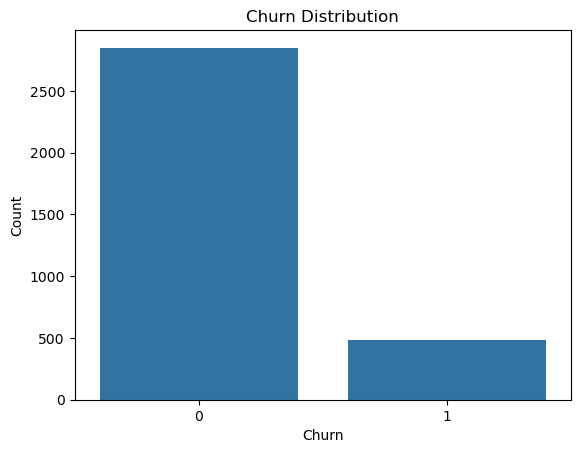

In [46]:
# Plot churn distribution to check class imbalance

sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Save the plot generated
plt.savefig("images/churn_distribution.png")
plt.show()

Observation: Majority of customers have not churned, showing a class imbalance. This could bias the model if not addressed.

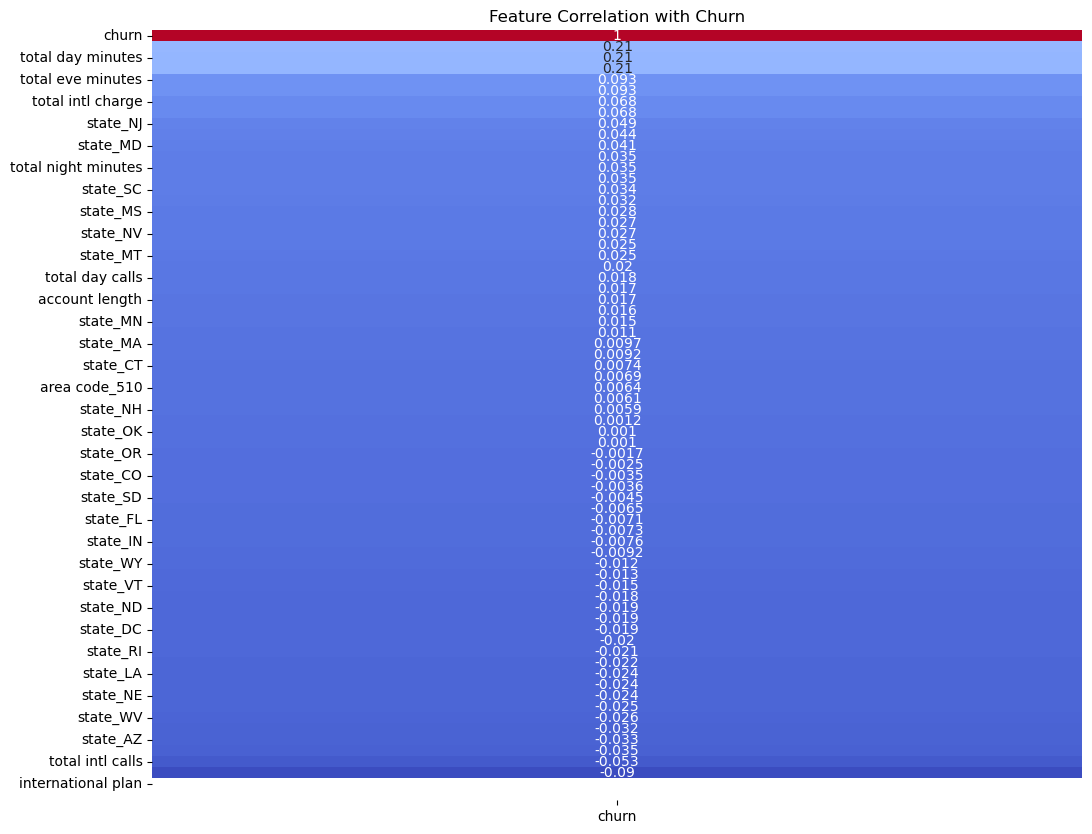

In [23]:
# Plot correlation of features with churn
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True)[['churn']].sort_values(by='churn', ascending=False), 
            annot=True, cmap='coolwarm', cbar=False)
plt.title('Feature Correlation with Churn')
plt.show()

Observation: Features such as 'international plan', 'total day charge', and 'customer service calls have relatively high correlation with churn. These are important features for model inputs.

# 4. Train-Test Split and Scaling

In [14]:
# Separate features and target variable
X = df.drop('churn', axis = 1)
y = df['churn']

In [16]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Normalise the feature values to ensure unfair weighting
# Fit the scaler on training data only to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Output shape and balance checks
# Shape of training features
print("\nTraining set size:", X_train.shape)  

# Shape of test features
print("Test set size:", X_test.shape)      
print("\nTarget distribution in training set:")

# Shows churn vs non-churn proportions in training data  
print(y_train.value_counts(normalize=True))  



Training set size: (2666, 69)
Test set size: (667, 69)

Target distribution in training set:
churn
0    0.855214
1    0.144786
Name: proportion, dtype: float64


This shows that 85.5% of customs in the training set did not churn, while 14.5% did indicating a class imbalance that should be considered during modeling.

# 5. Train & Evaluate Models
## 5.1 Logistic Regression Model


In [27]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]

In [33]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.54      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667



The classification report shows:
- Precision: 54% of churn predictions were correct.
- Recall: The model caught 21% of real churners.
- F1-score: A score of 0.36 shows the overall balance of precision and recall is moderate.

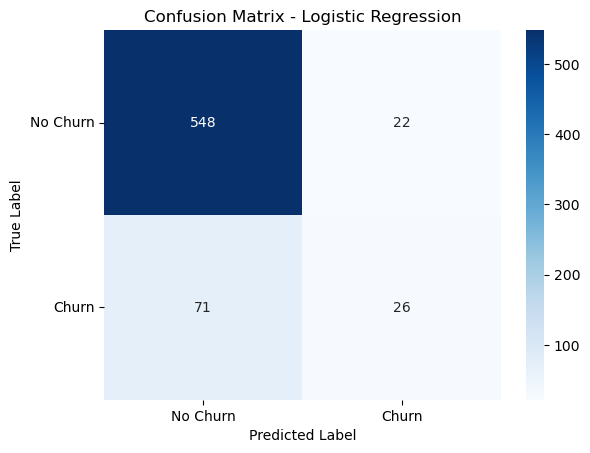

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visual confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'], rotation=0)

# Save plot generated
plt.savefig("images/confusion_matrix_logreg.png")
plt.show()

Confusion matrix breakdown:
- True Negatives (top-left): 548 Non-churners correctly predicted.
- False Positives (top-right): 22 Non-churners wrongly predicted as churners.
- False Negatives (bottom-left): 71 Churners wrongly predicted as non-churners.
- True Positives (bottom-right): 26 Churners correctly predicted.

In [35]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))

ROC AUC Score: 0.8006872852233677


The ROC AUC score measures the model's ability to separate churners from non-churners across all thresholds.

Logistic Regression ROC AUC of 0.80 indicates strong ability to rank churners above non-churners.

## 5.2 Random Forest Model

In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # Tree-based models don't need scaled input
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [39]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.93      0.59      0.72        97

    accuracy                           0.93       667
   macro avg       0.93      0.79      0.84       667
weighted avg       0.93      0.93      0.93       667



Interpretation:
- Precision: Of all predicted churners, 93% were actual churners.
- Recall: The model caught 59% of all churners.
- F1-score: High average of 0.72 between precision and recall.

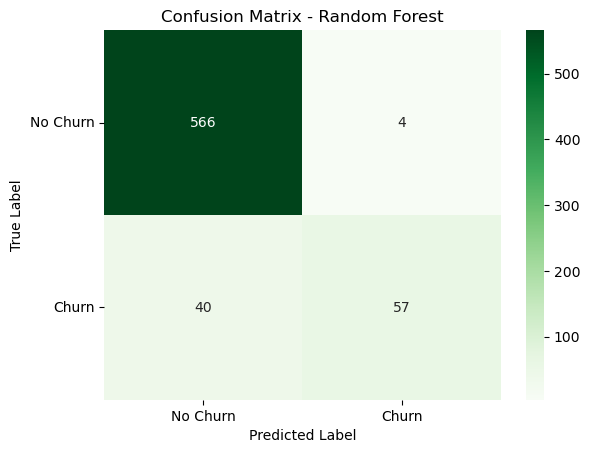

In [49]:
# Visual confusion matrix for Random Forest

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn'], rotation=0)

# Save plot generated
plt.savefig("images/confusion_matrix_randforest.png")
plt.show()


Confusion Matrix Breakdown:
- True Negatives (TN): 566
- False Positives (FP): 4
- False Negatives (FN): 40
- True Positives (TP): 57


In [41]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

ROC AUC Score: 0.899864351600651


ROC AUC Score: 0.89 shows excellent separation between churn and non-churn classes

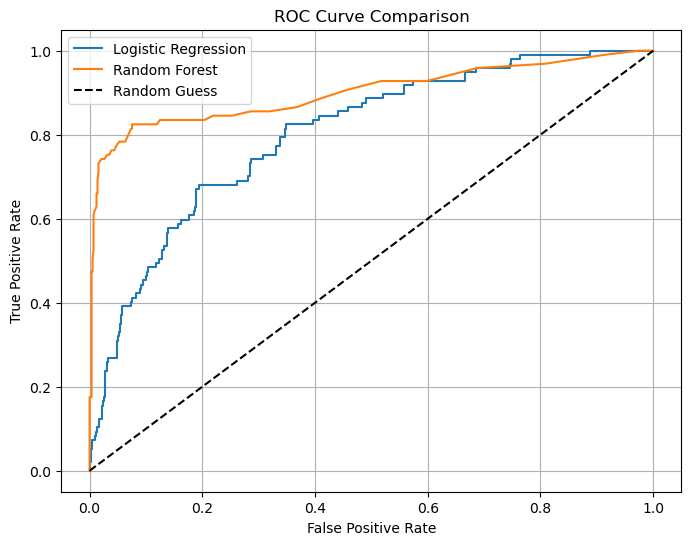

In [50]:
# Visualize ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)

# Save plot generated
plt.savefig("images/ROC_Curve.png")
plt.show()


Observation:
The ROC curve shows Random Forest slightly outperforming Logistic Regression.
Both models perform significantly better than random guessing.

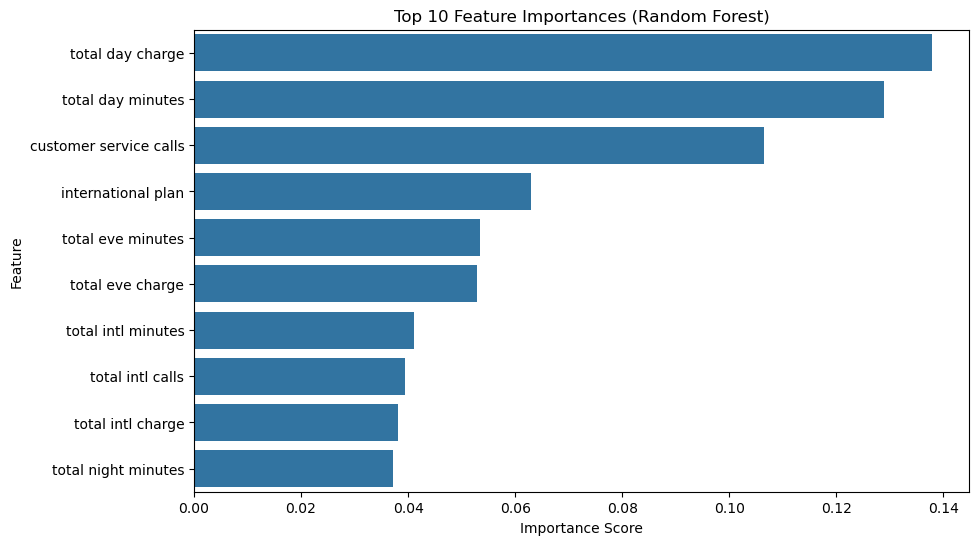

In [51]:
# Feature Importance from Random Forest

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)[:10]  # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Save plot generated
plt.savefig("images/features.png")
plt.show()

Observation:
The most important features driving churn predictions include:
- international plan
- total day charge & minutes
- number of customer service calls

These align well with EDA findings and should be the focus of retention strategies.

# 6.Recommendations

1. Focus retention efforts on customers with an international plan and high day charges.
2. Monitor customers making frequent customer service calls as they're more likely to churn.
3. Logistic regression gives interpretable results; random forest gives higher accuracy and handles feature interactions.
4. Use model predictions to proactively offer targeted promotions to high-risk customers.